# Prediccion y Clasificación de Alquileres en Madrid

-  Proyecto orientado al analisis, prediccion y clasificacion de alquileres en la provincia de Madrid mediante tecnicas de ciencia de datos y machine learning.

Objetivos principales:
- Predecir el precio de alquiler de una vivienda (tarea de regresion).
- Predecir si un inmueble dispone de balcon (tarea de clasificacion).

Índice del notebook

## 1. Inicio y Configuración

#### Importacion de librerias

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# PREPROCESAMIENTO 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer
from sklearn.preprocessing import(MinMaxScaler, OneHotEncoder, StandardScaler,RobustScaler,PowerTransformer,QuantileTransformer)
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import FunctionTransformer
from sklearn import clone

In [10]:
# MODELOS CLASIFICACION
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# MODELO REGRESION
from sklearn.linear_model import LinearRegression

# VALIDACION CRUZADA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate


### Carga del dataset

In [108]:
df = pd.read_csv('idealista-madrid.csv')
df.sample(n=3)

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
6779,98083360,https://www.idealista.com/en/inmueble/98083360/,Flat / apartment for rent in calle de Diego de...,Flat,4000,2.0,False,Property Plus,240,NaN,...,True,False,True,False,False,"Calle de Diego de León, Subdistrict Castellana...",Barrio de Salamanca,Castellana,28006.0,8 August
5305,98596965,https://www.idealista.com/en/inmueble/98596965/,Flat / apartment for rent in San Juan Bautista,Flat,2800,1.0,False,Immomadrid,215,177.0,...,True,False,False,True,False,", Subdistrict San Juan Bautista, District Ciud...",Ciudad Lineal,San Juan Bautista,28043.0,28 October
8648,98775259,https://www.idealista.com/en/inmueble/98775259/,Flat / apartment for rent in calle de Churruca...,Flat,1300,1.0,False,Buy&Rent Real Estate Services,70,60.0,...,False,False,False,False,False,"Calle de Churruca, 14, Subdistrict Chueca-Just...",Centro,Chueca-Justicia,28004.0,3 October


## 2. Entendimiento de los Datos

### Inspeccion del DataSet

In [79]:
df.head(1)

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
0,99439319,https://www.idealista.com/en/inmueble/99439319/,"Flat / apartment for rent in pablo luna, 4",Flat,1400,NaN,False,Silcasas Ochocientas,60,NaN,...,True,False,False,False,False,"pablo luna, 4, Subdistrict Castilla, District ...",Chamartín,Castilla,28046.0,7 November


- tipos de datos

In [149]:
print(
    f"DATA FRAME\n"
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )

print(df.dtypes.to_frame(name="TIPOS DE DATOS"))

DATA FRAME
Numero de filas y columnas:(9229, 32)
Numero total de elementos : 295328
 
                  TIPOS DE DATOS
web_id                     int64
url                          str
title                        str
type                         str
price                      int64
deposit                  float64
private_owner               bool
professional_name            str
floor_built                int64
floor_area               float64
floor                        str
year_built               float64
orientation                  str
bedrooms                   int64
bathrooms                  int64
second_hand                 bool
lift                        bool
garage_included             bool
furnished                   bool
equipped_kitchen            bool
fitted_wardrobes            bool
air_conditioning            bool
terrace                     bool
balcony                     bool
storeroom                   bool
swimming_pool               bool
garden_area            

### Redimensionamiento dataset

- Eliminamos columnas no utiles para el proyecto.

In [109]:
# hacemos una copia del df original y realizamos el drop de la columna que no queremos y mostramos el resultado
df_copy = df.copy()

cols_a_eliminar = ["location", "web_id", "url", "subdistrict"] 
df_new = df_copy.drop(columns=cols_a_eliminar)

df_new.columns.to_list()


['title',
 'type',
 'price',
 'deposit',
 'private_owner',
 'professional_name',
 'floor_built',
 'floor_area',
 'floor',
 'year_built',
 'orientation',
 'bedrooms',
 'bathrooms',
 'second_hand',
 'lift',
 'garage_included',
 'furnished',
 'equipped_kitchen',
 'fitted_wardrobes',
 'air_conditioning',
 'terrace',
 'balcony',
 'storeroom',
 'swimming_pool',
 'garden_area',
 'district',
 'postalcode',
 'last_update']

In [81]:
# solo dtypes numéricos
df_new.select_dtypes(include='number').dtypes

price            int64
deposit        float64
floor_built      int64
floor_area     float64
year_built     float64
bedrooms         int64
bathrooms        int64
postalcode     float64
dtype: object

### Revision NULOS - VALORES OCULTOS -  ESPACIOS EN BLANCOS - VALORES = 0
  - comprobamos si hay VALORES NULOS  en todo el dataframe reduced
  - comprobamos si hay ESPACIOS EN BLANCO en todo el dataframe reduced
  - comprobamos si hay VALORES OCULTOS  en todo el dataframe reduced
  - comprobamos si hay VALORES IGUAL A ZEROS en todo el dataframe reduced

In [82]:
df_nulos = pd.DataFrame({    
    'nulos': df_new.isna().sum()                                                        # muestra la suma de los nulos o faltantes contenidos en las columnas 
})

df_espacios = pd.DataFrame({
    "espacios": df_new.apply(lambda col: col.astype(str).str.strip().eq("").sum())      # muestra la suma de celdas con espacios vacios
})

valores_ocultos = ["", " ", "NA", "N/A", "na", "null", "None", "?", ".", "0"]

df_ocultos = pd.DataFrame({ 
    'ocultos': df_new.apply(lambda col: col.astype(str).isin(valores_ocultos).sum()) })  #  trasforma todas las columnas en string para poder comparar con valores_ocultos 

df_zeros= pd.DataFrame({
    "valores  = 0 ":df_new.apply( lambda col: (col == 0).sum())                           # suma todos los valores iguales a zeros de todas las columnas
})

df_Nan= pd.concat([df_nulos, df_espacios, df_ocultos, df_zeros], axis=1)
df_Nan

,nulos,espacios,ocultos,valores = 0
title,0,0,0,0
type,0,0,0,0
price,0,0,0,0
deposit,3822,0,0,0
private_owner,0,0,0,7622
professional_name,1607,0,0,0
floor_built,0,0,9,9
floor_area,5291,0,0,1
floor,321,0,0,0
year_built,6336,0,0,0


- El DataFrame muestra que el DataSet presenta variedad de valores respecto a: nulos , valor a zero, y oculto. 
  Hay feature que presentan valores a 0 que interpretamos que es debido a que no existe esta caracteristica en los piso ( ejemplo: garden_area) y habar que tenerlo presente en nuestro estudio y valorar como tratar estos datos.

- mostramos las filas cuyos valores sean indenticos en sus columnas.

In [83]:
num_cols = df_new.select_dtypes(include='number').columns.tolist()  # seleccion de columnas numericas.

df_new.groupby(num_cols).size().reset_index(name='count').query('count > 1').sort_values('count', ascending=False) # agrupamos los valores repetidos y los ordenamos.

,price,deposit,floor_built,floor_area,year_built,bedrooms,bathrooms,postalcode,count
86,850,1.0,56,52.0,1961.0,2,1,28042.0,2
337,1350,2.0,95,80.0,1962.0,2,1,28008.0,2
448,1750,1.0,159,129.0,2004.0,4,3,28222.0,2
521,2230,1.0,57,56.0,1903.0,1,1,28010.0,2
538,2300,3.0,136,118.0,1971.0,4,3,28046.0,2


- Resultado: tenemos 5 grupos con un total de 10 filas repetidas. El modelo no se verá afectado por estas cantidades.

In [84]:
# solo dtypes string
df_new.select_dtypes(include='str').dtypes

title                str
type                 str
professional_name    str
floor                str
orientation          str
district             str
last_update          str
dtype: object

## 3. EDA

### VALORES NUMERICOS
Tabla de estadisticos principal para ver centralidad y dispercion

Renombramos las descripciones, para practicar realizar el diccionario y para que se lea mas rapido en español.

In [85]:
# describir solo las numéricas
df_new.describe(include='number').round(3)

,price,deposit,floor_built,floor_area,year_built,bedrooms,bathrooms,postalcode
count,9229.000,5407.000,9229.000,3938.000,2893.000,9229.000,9229.000,6834.000
mean,1937.996,1.471,110.285,94.357,1975.492,2.260,1.788,28076.948
std,1615.063,0.622,87.184,72.823,34.929,1.333,1.077,171.686
min,400.000,1.000,0.000,0.000,1800.000,0.000,1.000,28001.000
25%,1000.000,1.000,60.000,54.000,1960.000,1.000,1.000,28009.000
50%,1400.000,1.000,85.000,75.000,1978.000,2.000,2.000,28023.000
75%,2300.000,2.000,127.000,110.000,2003.000,3.000,2.000,28043.000
max,25000.000,6.000,990.000,995.000,2022.000,25.000,20.000,28950.000


 REPORT columnas numericas:
- en 'price' existe una diferencia significativa entre media y mediana, confirmandono presencia de valores outliers. El rango entre valores min y max es dispar. La desviacion estandar tiene un valor muy elevado respecto a la media( aprox. 83%) que tendremos que tener en cuenta y tratar.
- en 'deposit' faltan muchos registros y presenta una desviacion elevada. No es un dato util para el modelo y es cuestionable si utilizarlo o no. 
- en 'floor_built' presentan valores minimos a 0. Como revisamos anteriormente, hemos comprobado que solo afecta a 9 registros, que resultan de escasa importancia.Solo abria que comprobar que este 0 sea un por ejemplo un Bajo.  Media y mediana estan relativamente cerca y no hay mucha desviacion.
- en 'floor area' faltan muchos registros, y esto puede ser un problema por ser factor de peso para la predicción del  precio y la variable 'balcony'.
- 'floor_built" e "floor_area" tienen valores muy parecido, pero en 'area' faltan muchos datos. Podriamos utilizar una valoracion cruzada, utilizando solo 'floor_build" para evitar introducir datos innecesarios al modelo.
- en 'years' a destacar la falta elevada de registros y podria ser un dato importante para el estudio. Una posible solucion seria la discretizacion en categorias ("pre_guerra" ,"Antiguos", "Moderno" , " Desconocido" )
- en ' bethroom' y 'bathroom' hay valores maximos muy altos, Habria que revisar de que se trata, probablemente son errores. Estos valroes sesgaria mucho el modelo. Habria que corregirlos o eliminarlos.
- en ' postalcode'  a destacar que faltan datos y podriamos realizar tal vez una extrapolacion de otra feature de tipo categorica que tenemos disponible(' location') que en caso fuera necesario podriamos realizar la operacion.

CONCLUSION: 
Es importante tener en cuenta la lata dispercion en el precio ( un 83% de la media).
Revisar los valores maximo de bethrooms y bathrooms.
La falta de datos en 'years' es critica , siendo importante para una predicción en el precio.
Considerar la idea de utilizar solo floor_built para evitar introducir demasiados datos al modelo que no sean necesarios. 

#### ANALISIS VARIABLE OBJETIVO 'price'

Outliers detectados: 551 (5.97%)


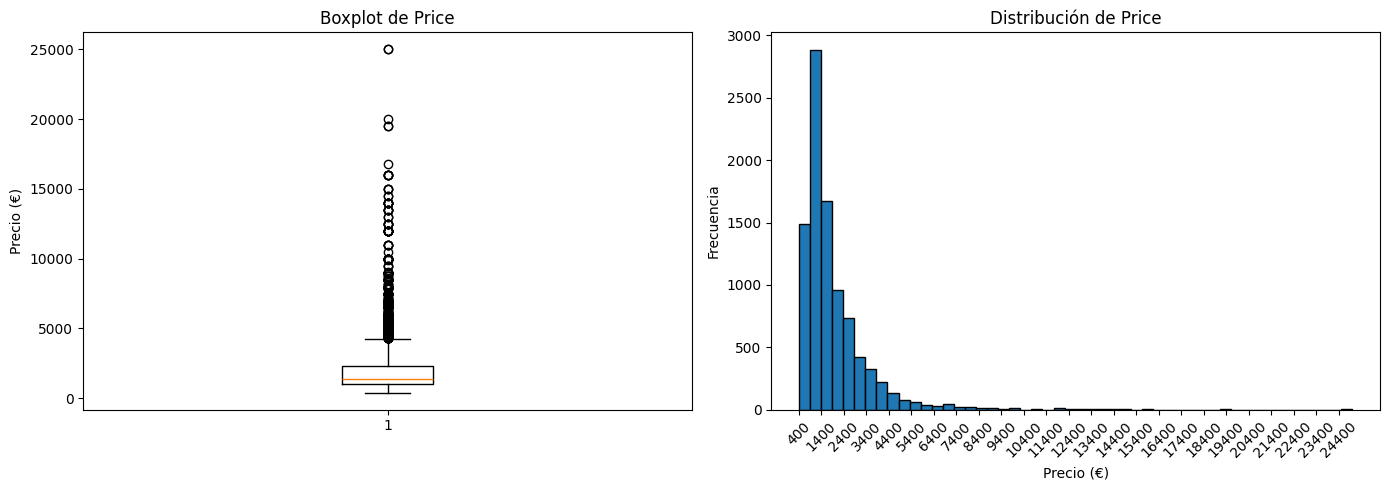


Límite inferior: -950.00€
Límite superior: 4250.00€

Precio mínimo: 400€
Precio máximo: 25000€

Precio medio: 1938.00€
Precio mediano: 1400.00€


In [87]:
# Método 1: Rango intercuartílico (IQR)
Q1 = df_new['price'].quantile(0.25)
Q3 = df_new['price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_new[(df_new['price'] < limite_inferior) | (df_new['price'] > limite_superior)]
print(f"Outliers detectados: {len(outliers)} ({len(outliers)/len(df_new)*100:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
axes[0].boxplot(df_new['price'].dropna())
axes[0].set_title('Boxplot de Price')
axes[0].set_ylabel('Precio (€)')

# Histograma
axes[1].hist(df_new['price'].dropna(), bins=50, edgecolor='black')
axes[1].set_title('Distribución de Price')
axes[1].set_xlabel('Precio (€)')
axes[1].set_ylabel('Frecuencia')
plt.xticks(range(400, 25000, 1000), rotation=45)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print(f"\nLímite inferior: {limite_inferior:.2f}€")
print(f"Límite superior: {limite_superior:.2f}€")
print(f"\nPrecio mínimo: {df_new['price'].min()}€")
print(f"Precio máximo: {df_new['price'].max()}€")
print(f"\nPrecio medio: {df_new['price'].mean():.2f}€")
print(f"Precio mediano: {df_new['price'].median():.2f}€")


CONCLUSIONES: 
El grafico de la distribucion muestra claramente una asimetrica, con cola hacia la derecha como hay que esperar.
El bopx-plot muestra claramente los outliers. Mantendremos todos los registros y en un primer momento no ivestigaremso si son errores, pero se trataran con una Trasformacion Logaritmica en el Pipeline que costruiremos para el modelo, para reducir su influencia sin eliminarlos y ademas utilizaremos un modelo mas robusto como RobustScaler utilizando la mediana en vez de la media.

#### Descripcion univariada 

Despues del analisis realizado previamente, elegimos las siguientes varables: 'floor-built' / 'bedrooms' / 'bathrooms' / 'years_built'

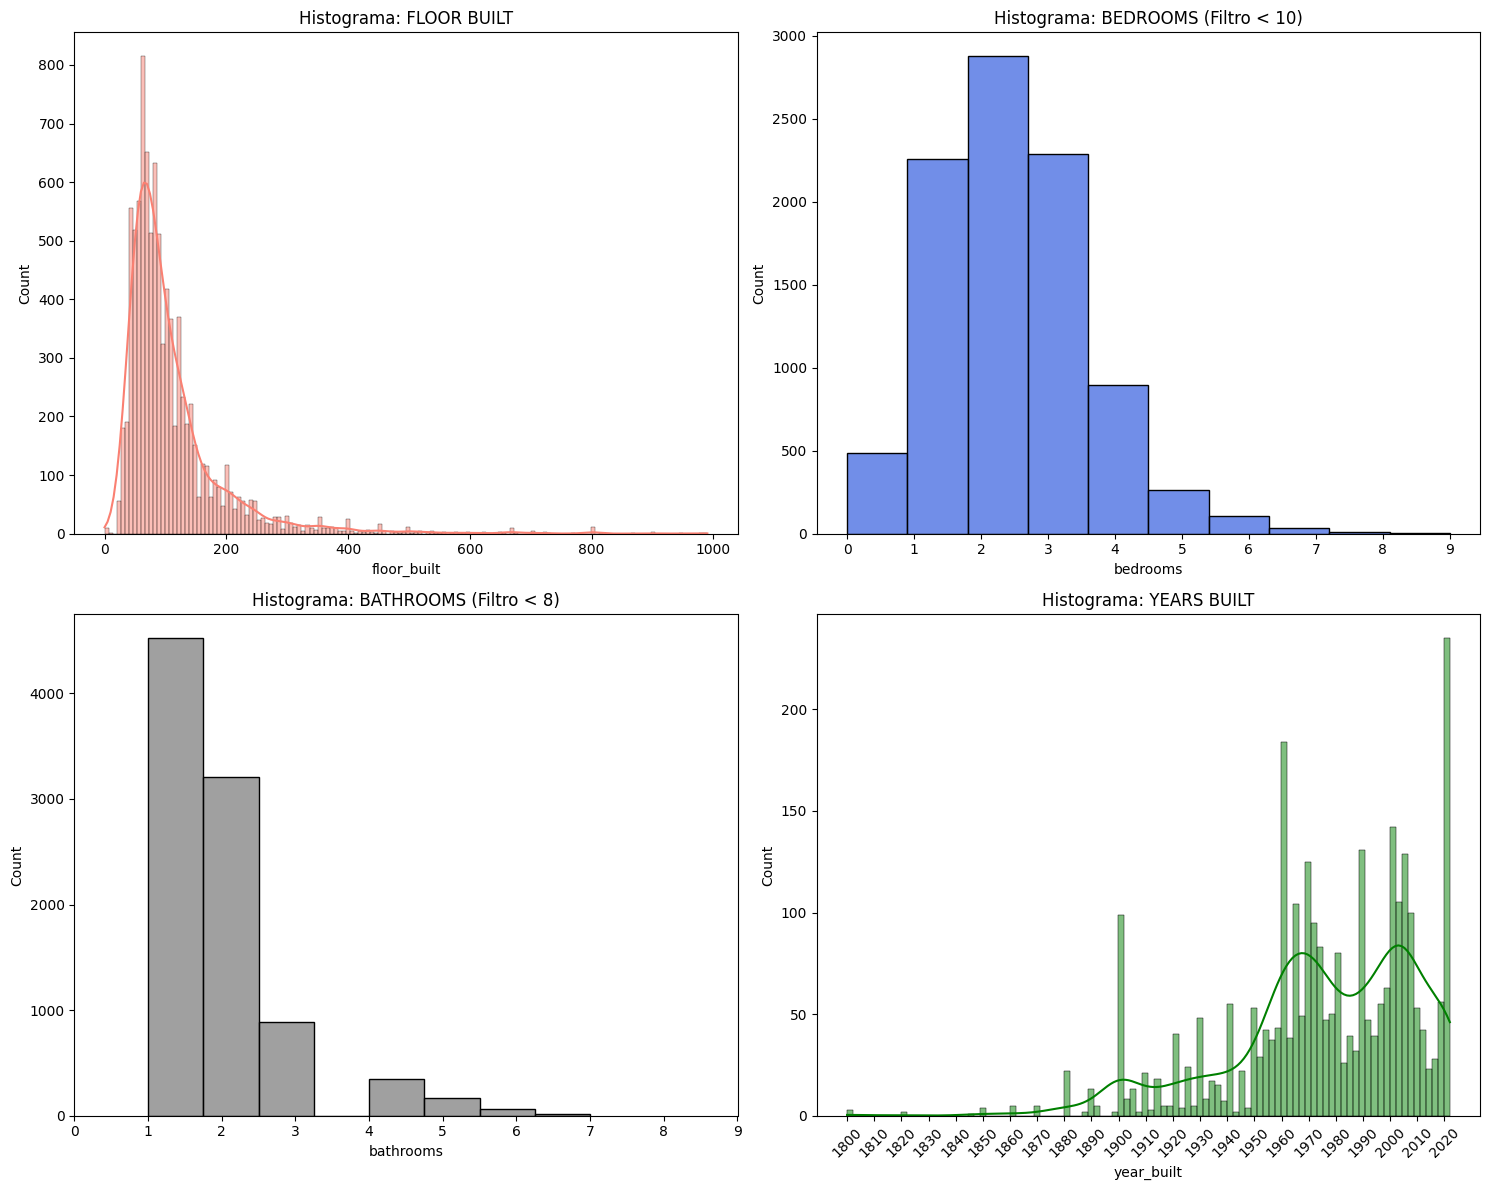

In [88]:
plt.figure(figsize=[15,12])

# Subplot FLOOR BUILT
plt.subplot(2,2,1)
sns.histplot(data=df_new, x='floor_built', bins=150, kde=True, color='salmon')
plt.title('Histograma: FLOOR BUILT')

# Subplot BEDROOM
plt.subplot(2,2,2)
sns.histplot(data=df_new[df_new['bedrooms'] < 10], x='bedrooms', bins=10, kde=False, color='royalblue')
plt.title('Histograma: BEDROOMS (Filtro < 10)')
plt.xticks(range(0, 10, 1))

# Subplot BATHROOM
plt.subplot(2,2,3)
sns.histplot(data=df_new[df_new['bathrooms'] < 8], x='bathrooms', bins=8, kde=False, color='gray')
plt.title('Histograma: BATHROOMS (Filtro < 8)')
plt.xticks(range(0, 10, 1))

# Subplot YEAR
plt.subplot(2,2,4)
sns.histplot(data=df_new, x='year_built', bins=100, kde=True, color='green')
plt.title('Histograma: YEARS BUILT')
plt.xticks(range(1800, 2030, 10), rotation=45)

plt.tight_layout()
plt.show()

Mas detalle para el grafico de superficie costruidas.

(0.0, 400.0)

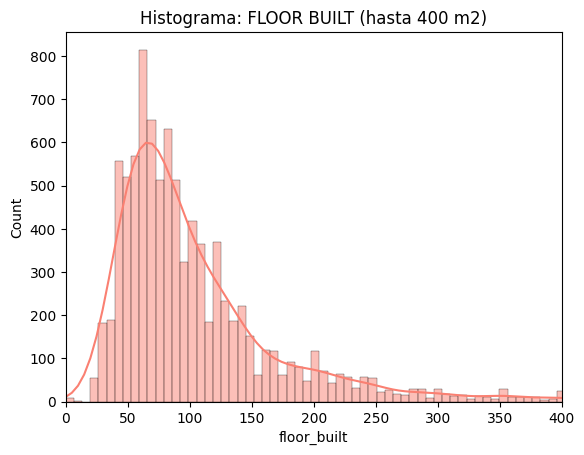

In [89]:
sns.histplot(data=df_new, x='floor_built', bins=150, kde=True, color='salmon')
plt.title('Histograma: FLOOR BUILT (hasta 400 m2)')
plt.xlim(0, 400)

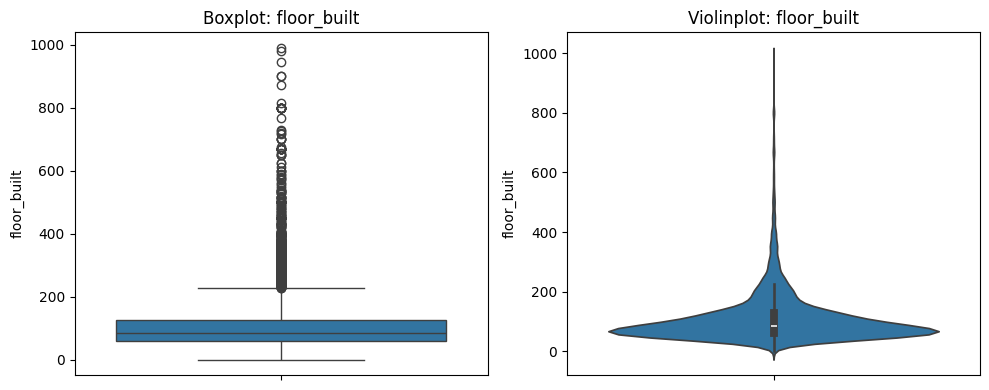

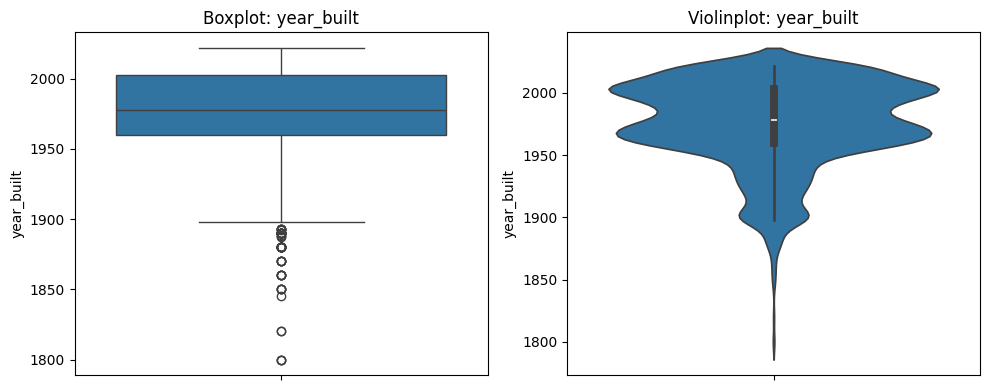

In [90]:
columnas_seleccionadas = ['floor_built','year_built']

for i in columnas_seleccionadas:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))      
    
    # Boxplot
    sns.boxplot(data=df_new, y=i, ax=axs[0])
    axs[0].set_title(f'Boxplot: {i}')
        
    # Violinplot
    sns.violinplot(data=df_new, y=i, ax=axs[1])
    axs[1].set_title(f'Violinplot: {i}')
    
    fig.tight_layout()
    plt.show()

CONCLUSIONES:   
- Los graficos de 'floor_built' muestran claramente una distribucion reducidas, asimetrica cuya media y mediana son muy parecida. Cosnidermoas los outliers no como errores , pero si se tendran en cuenta su tratamiento para evita sesgos que pueden afectar al modelo.
- Los graficos de ' years_built' tiene una distribucion a sierra, que muestra la evidencias de la tendencia de la oferta de alquiler de pisos que se concentra sobretodo en los de nnueva costruccion.
- No se han tratados features como bedrooms y barhroom porque cosideramos qeu no aportan mas inforamcion con graficos tipo plot.

Como inciden los outliers sobre el total de registros 

In [111]:
# función para cuantificar outliers (IQR)
def contar_outliers_iqr(df_new, cols=None, factor=1.5):
    cols = cols if cols is not None else df_new.select_dtypes(include=[np.number]).columns
    res = {}
    for c in cols:
        q1 = df_new[c].quantile(0.25)
        q3 = df_new[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - factor * iqr
        upper = q3 + factor * iqr
        mask = (df_new[c] < lower) | (df_new[c] > upper)
        res[c] = {'outliers / ud': int(mask.sum()), '%': round(mask.mean()*100,2)}   # mask (:boolean (si-no outliers)) / cuenta cuantos outlieres hay  # pct es el procentaje 
    return pd.DataFrame(res).T

contar_outliers_iqr(df_new, cols=['floor_built','year_built', 'bedrooms', 'bathrooms'])

,outliers / ud,%
floor_built,675.0,7.31
year_built,62.0,0.67
bedrooms,52.0,0.56
bathrooms,610.0,6.61


CONCLUSIONES:
- Los porcentajes más evidentes son en 'floor_built' y 'bathrooms' que aunque no sean porcentajes altos si es importante tenerlos en cuentas.
- Ambos podria tener logica, a mayor superficie mayor numeros de baños.Es importante considerarlo. Confirmamos la teoria con un ScatterPLot para confirmar que no hallan errores.
- La feature ' bedrooms' aunque no sea relevante, comprobaremos con un ScatterPLot para decir si conservar los registros o eliminarlos para evitar generar ruido en el modelo.
- La feature 'year_built' son irrisoria. Son los pisos muy antiguos y no es necesario eliminar.

Scaterplot floor_built vs Bathroom para detectar posibles errores

#### Descripcion Multivariada

Grado de correlacion entre variables,  utilizando el metho Spearman, mas robusto frente a la presencia de outliers. entre variables numericas elegidas.

In [133]:
df_corr = df_new[['floor_built', 'year_built', 'bedrooms', 'bathrooms']].copy()
df_corr = df_corr.apply(pd.to_numeric) 
print (f"\n Correlacion Pearson ")
print(df_corr.corr())
print (f"\n Correlacion Spearman")
print(df_corr.corr(method='spearman'))


 Correlacion Pearson 
             floor_built  year_built  bedrooms  bathrooms
floor_built     1.000000    0.104845  0.729301   0.803921
year_built      0.104845    1.000000  0.047959   0.112018
bedrooms        0.729301    0.047959  1.000000   0.738524
bathrooms       0.803921    0.112018  0.738524   1.000000

 Correlacion Spearman
             floor_built  year_built  bedrooms  bathrooms
floor_built     1.000000    0.128076  0.785820   0.827913
year_built      0.128076    1.000000 -0.031158   0.142812
bedrooms        0.785820   -0.031158  1.000000   0.705370
bathrooms       0.827913    0.142812  0.705370   1.000000


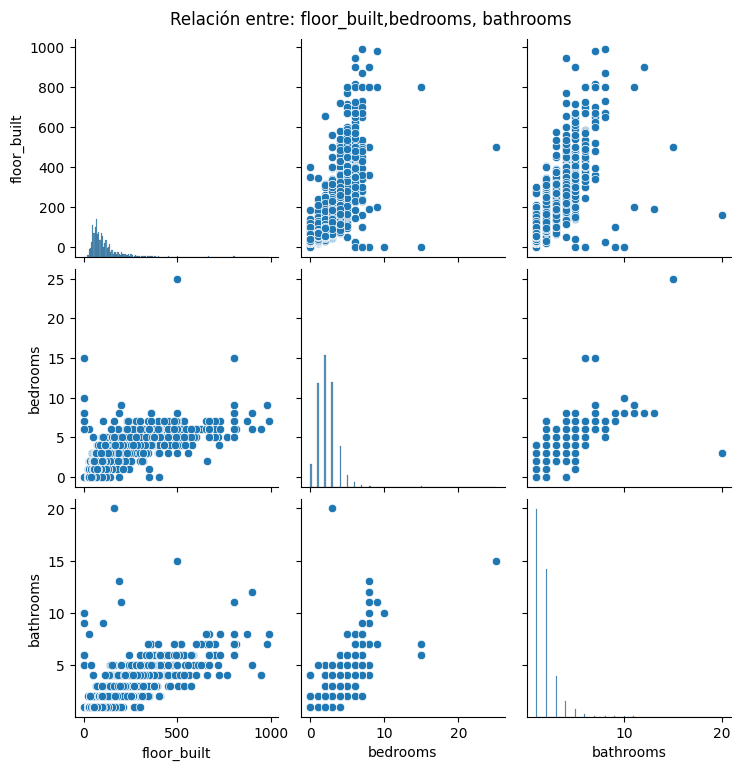

In [134]:
sns.pairplot(data=df_new, vars=['floor_built','bedrooms', 'bathrooms'], diag_kind='hist', height=2.5)
plt.suptitle('Relación entre: floor_built,bedrooms, bathrooms', y=1.02)
plt.show()

CONCLUSIONES:

Los diferentes methodos adoptados reflejan claramente la presencia de otuliers.

Entre la variable years y floor obviamente no hay relacion.
Hya un relacion moderada entre bathroom y bedrooms.
Una relacion fuerte entre floor y bathroom.

La relacion entre floor y bathroom y bedroom presenta outliers muy alejados que pueden generar ruido al modelo y merecen un analisis mas profundo.

##### CORR SUPERFICIE Y NUMEROS DE BAÑOS

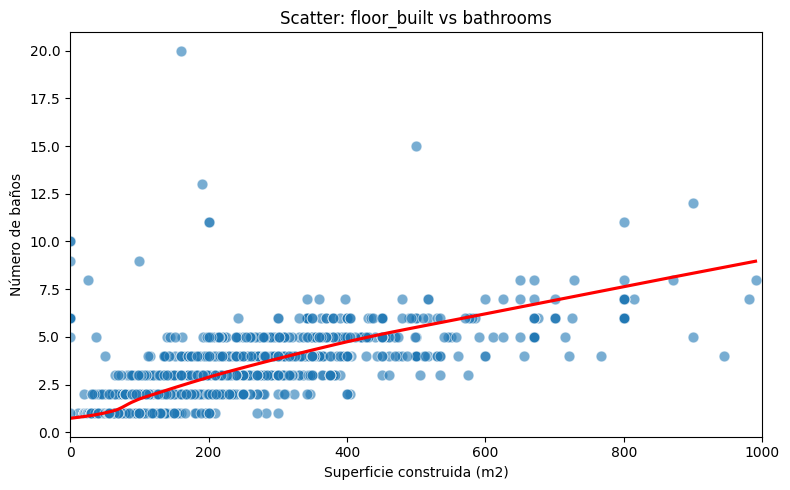

In [92]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_new, x='floor_built', y='bathrooms', alpha=0.6, edgecolor='w', s=60)
sns.regplot(data=df_new, x='floor_built', y='bathrooms', scatter=False, color='red', lowess=True)
plt.xlim(0, 1000)  # opcional: ajustar según rango
plt.title('Scatter: floor_built vs bathrooms')
plt.xlabel('Superficie construida (m2)')
plt.ylabel('Número de baños')
plt.tight_layout()
plt.show()

CONCLUSION: 

El grafico muestra una linea de tendencias positiva y bastante fuerte como es logico en este caso.
La correlacion entre las dos variables es fuerte, como lo demuestra el coeficiente r 0.827.

Presenta puntos muy alejados en los dos extremos de la linea, y mas acentuado en el extremo superior evidenciando errores de registros.

Estos errores es preferible elimarlos porque teniendo una relacion fuerte como en este caso, los puntos mas alejado generaran ruido porque el modelo intentará acercarse a estos puntos y debilitaran la correlacion.

Hay un sesgo muy evidente y se puede percibir en la linea de tendencias en el primer tramo donde aparecen mas puntos con poca correlacion. 

Seleccion de Pisos menores de 50 metros que tienen mas de 3 baños.

In [95]:
mask = (df_new['floor_built'] < 50 ) &(df_new['floor_built'] != 0 )& (df_new['bathrooms'] > 3)
cols = ['floor_built', 'bathrooms', 'bedrooms', 'price', 'type', 'district', 'garden_area', 'swimming_pool', 'balcony']  # ajustar según necesidad
errores_limpieza = df_new.loc[mask, cols].copy()
print(errores_limpieza.shape)
display(errores_limpieza.head(20))

(2, 9)


,floor_built,bathrooms,bedrooms,price,type,district,garden_area,swimming_pool,balcony
3328,26,8,6,15000,Detached,Zona Pueblo,False,True,True
8022,38,5,1,1290,Flat,Centro,False,False,False


Seleccion de Pisos con mas de 5 baños

In [96]:
# filtrar y contar pisos con >5 baños
mask_ext = (df_new['bathrooms'] > 6 ) & (df_new['floor_built'] < 200 )
errores_muchos_banos = df_new.loc[mask_ext, cols].copy()
print(f"Pisos con > 5 baños: {len(errores_muchos_banos)}")
display(errores_muchos_banos)

Pisos con > 5 baños: 7


,floor_built,bathrooms,bedrooms,price,type,district,garden_area,swimming_pool,balcony
2838,0,10,8,16800,Detached,Somosaguas,False,True,True
3034,0,9,8,8500,Detached,Somosaguas,False,True,False
3285,0,10,10,16000,Detached,Zona Carretera del Plantío,False,True,True
3328,26,8,6,15000,Detached,Zona Pueblo,False,True,True
4775,190,13,8,10000,Detached,Moncloa,False,True,False
4776,100,9,7,12000,Detached,Moncloa,False,True,False
8174,160,20,3,3350,Penthouse,Centro,False,False,True


In [97]:
# filtrar y contar pisos con > 5 baños
mask_ext = (df_new['bathrooms'] > 5 ) 
errores_muchos_banos = df_new.loc[mask_ext, cols].copy()
print(f"Pisos con >5 baños: {len(errores_muchos_banos)}")
display(errores_muchos_banos)

Pisos con >5 baños: 96


,floor_built,bathrooms,bedrooms,price,type,district,garden_area,swimming_pool,balcony
224,363,6,4,13500,Duplex,Chamartín,False,True,False
292,517,6,6,8000,Flat,Chamartín,False,True,False
297,530,6,7,14000,Penthouse,Chamartín,False,False,True
299,517,7,6,8000,Duplex,Chamartín,False,True,False
345,517,7,6,8000,Flat,Chamartín,False,True,True
...,...,...,...,...,...,...,...,...,...
7775,480,7,6,5000,Detached,Hortaleza,False,True,False
7786,405,6,5,4800,Semi-detached,Hortaleza,False,True,True
8174,160,20,3,3350,Penthouse,Centro,False,False,True
8614,492,6,5,4900,Flat,Centro,False,False,True


CONCLUSIONES:
Hay ciertas relaciones que pueden hacer pensar que sen reales. Par empezar la hubicacion donde se encuentra ( centro o zona residenciales ) y superficies bastantes grandes.
Hay otros que no por superficie resulta indica probablemente un error.
Tambien a primera vista hay cierta posible relacion entre nnumeros de habitaciones y numero de baños.
Debido a que la cantidad es irrelevante es preferible elimnar estos 18 pisos , antes de aplicar cambios como apliar pro ejemplo  un valor medio.

Vamos a deectar registros sospechosos y procedemos a su eliminacion.
Aplicaremos tres mascaras para filtrar los datos:
- mascara 1 --> será la incoherencia entre Superficie y Baños para detectar viviendas de menso de 200 metros con 5 baños.
- mascara 2 --> viviendas que tienen mas baños que habitaciones.
- mascara 3 --> viviendas con mas de 7 baños.

In [113]:
# Respaldo antes de la limpieza
df_backup = df_new.copy()

In [114]:
area = 200
bath = 5

mask1 = (df_new['floor_built'].notna()) & (df_new['bathrooms'].notna()) & (df_new['floor_built'] < area) & (df_new['bathrooms'] >= bath)
mask2 = df_new['bathrooms'] > (df_new['bedrooms'] + 2)
mask3 = df_new['bathrooms'] > 7

mask = mask1 | mask2 | mask3

print(f"Detectados {mask.sum()} registros sospechosos.")

# Ver qué registros cumplen la condición de 'sospechosos'
df_sospechosos = df_new.loc[mask, cols]
display(df_sospechosos.sort_values(by='bathrooms', ascending=False)) 

Detectados 32 registros sospechosos.


,floor_built,bathrooms,bedrooms,price,type,district,garden_area,swimming_pool,balcony
8174,160,20,3,3350,Penthouse,Centro,False,False,True
4869,500,15,25,16000,Detached,Moncloa,False,False,False
4775,190,13,8,10000,Detached,Moncloa,False,True,False
4661,900,12,8,6000,Detached,Moncloa,False,True,False
4913,800,11,8,12000,House,Moncloa,False,True,False
3049,200,11,9,9500,Detached,Urbanizaciones,False,True,False
3114,200,11,9,9500,Detached,Urbanizaciones,False,True,False
2838,0,10,8,16800,Detached,Somosaguas,False,True,True
3285,0,10,10,16000,Detached,Zona Carretera del Plantío,False,True,True
3034,0,9,8,8500,Detached,Somosaguas,False,True,False


Revisando los resultados hay datos claramente sospechosos y otros que puedne generar dudas, debido a la localizacion de estos pisos ( centros o zonas residenciasles), precio de alquiler ( elevado) y superficie muy grandes ( sin gardin). 

Al fin de evitar tener presencia de ruido y por la baja cantidad que representan (32) consideramos oportunos, proceder a eliminar estos registros, para beneficiar al modelo.

In [116]:
# Nuevo data frame limpio. Tambin reseteamos los index del dataframe
df_def = df_new.loc[~mask].copy().reset_index(drop=True)   # aplicamos filtro inverso.

# 2. Mostramos el resultado
print(f"Dataset original: {df_new.shape}")
print(f"Dataset limpio:   {df_def.shape}")
print(f"Registros eliminados: {len(df_new) - len(df_def)}")

Dataset original: (9229, 28)
Dataset limpio:   (9197, 28)
Registros eliminados: 32


##### CORR SUPERFICIE Y NUMEROS DE HABITACIONES

Utilizamos el nuevo dataSet acutalizado ( sin incongruencias de exceso de baños)

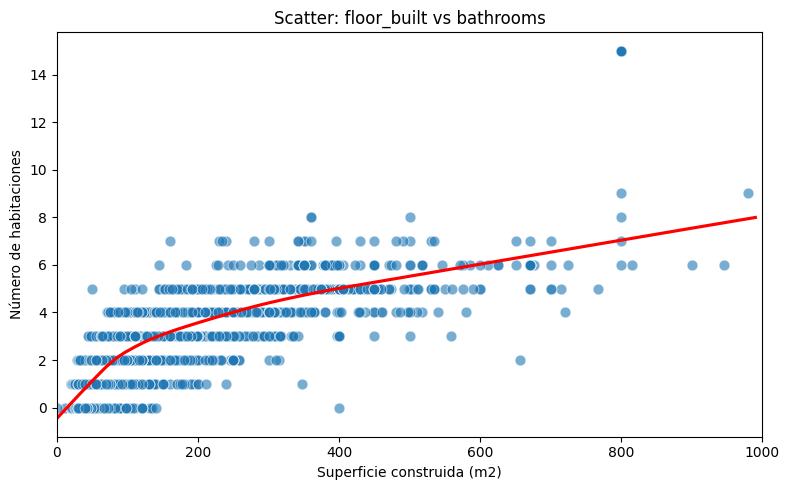

In [143]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_def, x='floor_built', y='bedrooms', alpha=0.6, edgecolor='w', s=60)
sns.regplot(data=df_new, x='floor_built', y='bedrooms', scatter=False, color='red', lowess=True)
plt.xlim(0, 1000)  # opcional: ajustar según rango
plt.title('Scatter: floor_built vs bathrooms')
plt.xlabel('Superficie construida (m2)')
plt.ylabel('Número de habitaciones')
plt.tight_layout()
plt.show()

Filtramos pisos para detectar posibles incongruencias, seleccionando pisos menores de 100 metros con mas de 4 habitaciones.
Aunque el grafico muestra un outliers evidente , segun la superficie al que hace referencia puede ser real ( ej: un cooliving ) y no lo tendremos en cuenta.

In [142]:
mask = (df_def['floor_built'] < 100 ) &(df_new['floor_built'] != 0 )& (df_def['bedrooms'] > 4)
cols = ['floor_built', 'bathrooms', 'bedrooms', 'price', 'type', 'district', 'garden_area', 'swimming_pool', 'balcony']  # ajustar según necesidad
errores_limpieza = df_new.loc[mask, cols].copy()
print(errores_limpieza.shape)
display(errores_limpieza.head(20))

(2, 9)


,floor_built,bathrooms,bedrooms,price,type,district,garden_area,swimming_pool,balcony
3047,65,1,1,1500,Flat,Urbanizaciones,False,False,True
5523,57,1,1,950,Flat,Ciudad Lineal,False,True,False


CONCLUSIONES:

Los resultados son correctos y mantendremos el df_def sin aplicar ningun cambio.

Comprobamos si hay mejora en las correalciones despues del cambio realizado 

In [119]:
# Correlación entre dos variables específicas
correlacion = df_new['floor_built'].corr(df['bathrooms'], method='spearman')

correlacion_new = df_def['floor_built'].corr(df_def['bathrooms'], method='spearman')
print(f"Antes del cambio: {correlacion:.4f}")
print(f"Despues del cambio: {correlacion_new:.4f}")

Antes del cambio: 0.8279
Despues del cambio: 0.8334


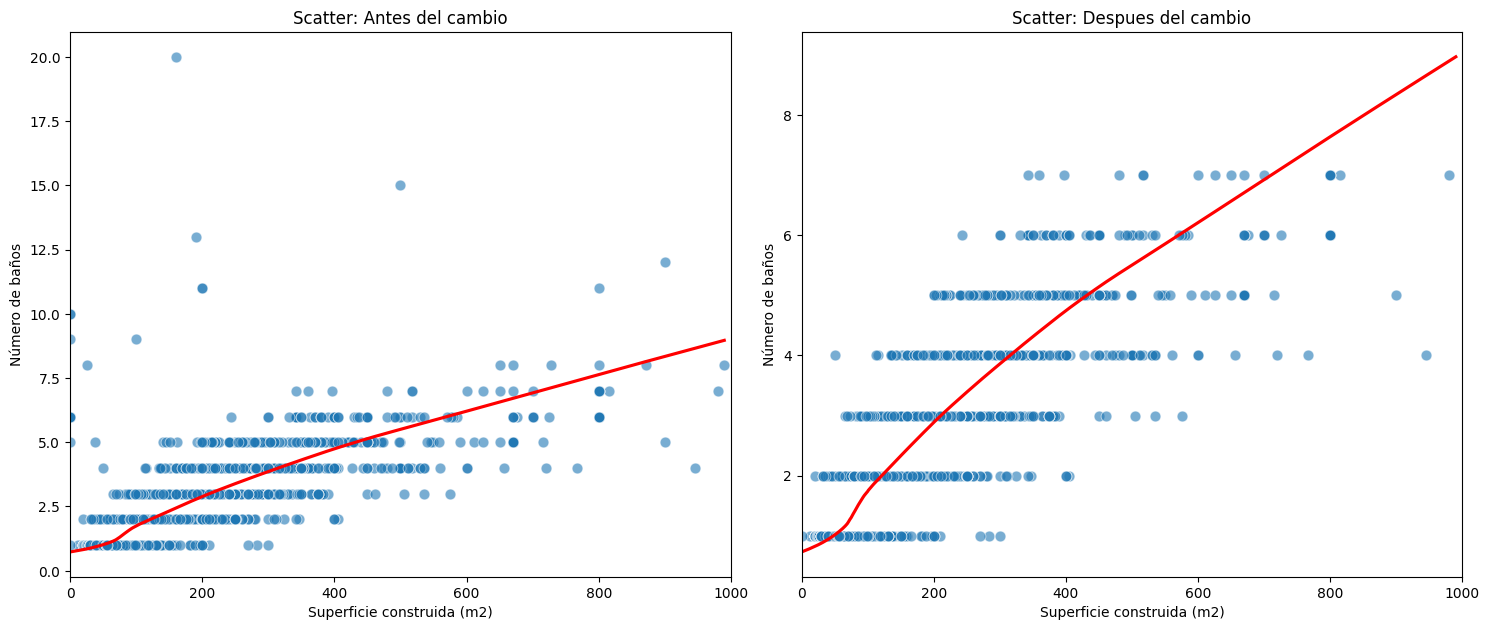

In [125]:
plt.figure(figsize=[15,12])

plt.subplot(2,2,1)
sns.scatterplot(data=df_new, x='floor_built', y='bathrooms', alpha=0.6, edgecolor='w', s=60)
sns.regplot(data=df_new, x='floor_built', y='bathrooms', scatter=False, color='red', lowess=True)
plt.xlim(0, 1000)  # opcional: ajustar según rango
plt.title('Scatter: Antes del cambio')
plt.xlabel('Superficie construida (m2)')
plt.ylabel('Número de baños')

plt.subplot(2,2,2)
sns.scatterplot(data=df_def, x='floor_built', y='bathrooms', alpha=0.6, edgecolor='w', s=60)
sns.regplot(data=df_new, x='floor_built', y='bathrooms', scatter=False, color='red', lowess=True)
plt.xlim(0, 1000)  # opcional: ajustar según rango
plt.title('Scatter: Despues del cambio')
plt.xlabel('Superficie construida (m2)')
plt.ylabel('Número de baños')
plt.tight_layout()
plt.show()

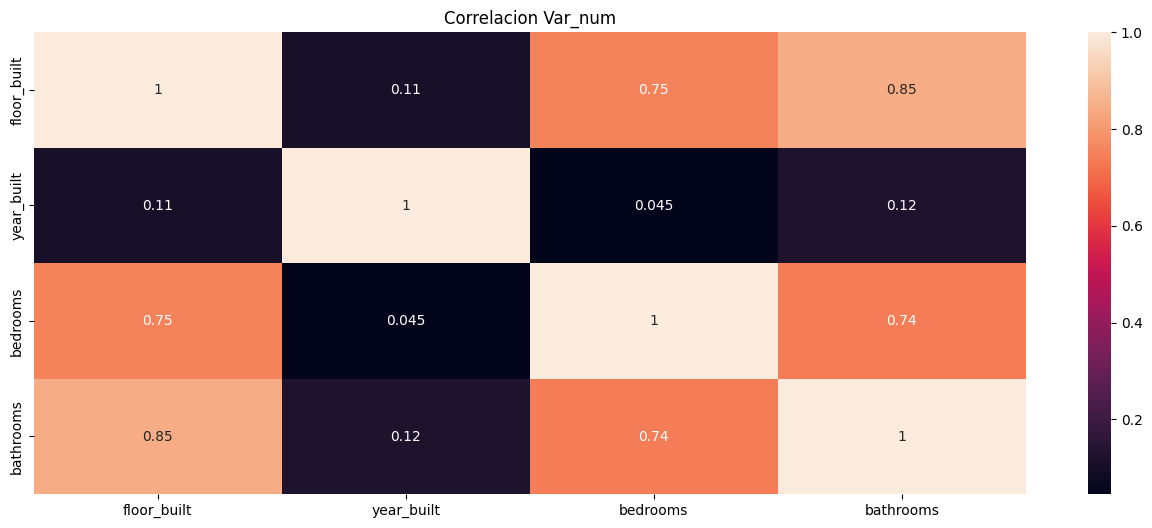

In [144]:
X = df_def[['floor_built', 'year_built', 'bedrooms', 'bathrooms']]

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(X.corr(),annot=True)
heatmap.set_title('Correlacion Var_num')

plt.show()

CONLUSIONES:

Hay un fuerte grado de correlacion entre floor y bathroom que puede generar colinealidad, un sobreajuste ( Overfitting) con informacion redundante.

Incialmente mantedremos las dos variables, siendo de relevancia a nivel comercial sobre la justificacion de la variable objetivo ( 'priece') y controlaremos los coeficientess.

En caso de verse obligados a renunciar a una de ellas, debemos que analizar el grado de correlacion de las variables con el precio. 

#### Correlacion 'price' vs VAR.NUMERICA

In [155]:
df_corr_price = df_def[['price','floor_built', 'year_built', 'bedrooms', 'bathrooms']].copy()
df_corr_price = df_corr_price.apply(pd.to_numeric) 
print (f"\n Correlacion Pearson ")
print(df_corr_price.corr())
print (f"\n Correlacion Spearman")
print(df_corr_price.corr(method='spearman'))


 Correlacion Pearson 
                price  floor_built  year_built  bedrooms  bathrooms
price        1.000000     0.716078    0.015490  0.489610   0.683106
floor_built  0.716078     1.000000    0.107416  0.752892   0.845453
year_built   0.015490     0.107416    1.000000  0.045380   0.123537
bedrooms     0.489610     0.752892    0.045380  1.000000   0.740031
bathrooms    0.683106     0.845453    0.123537  0.740031   1.000000

 Correlacion Spearman
                price  floor_built  year_built  bedrooms  bathrooms
price        1.000000     0.694555    0.020867  0.488539   0.668338
floor_built  0.694555     1.000000    0.130105  0.791230   0.833385
year_built   0.020867     0.130105    1.000000 -0.033293   0.142586
bedrooms     0.488539     0.791230   -0.033293  1.000000   0.704142
bathrooms    0.668338     0.833385    0.142586  0.704142   1.000000


<Figure size 5500x500 with 0 Axes>

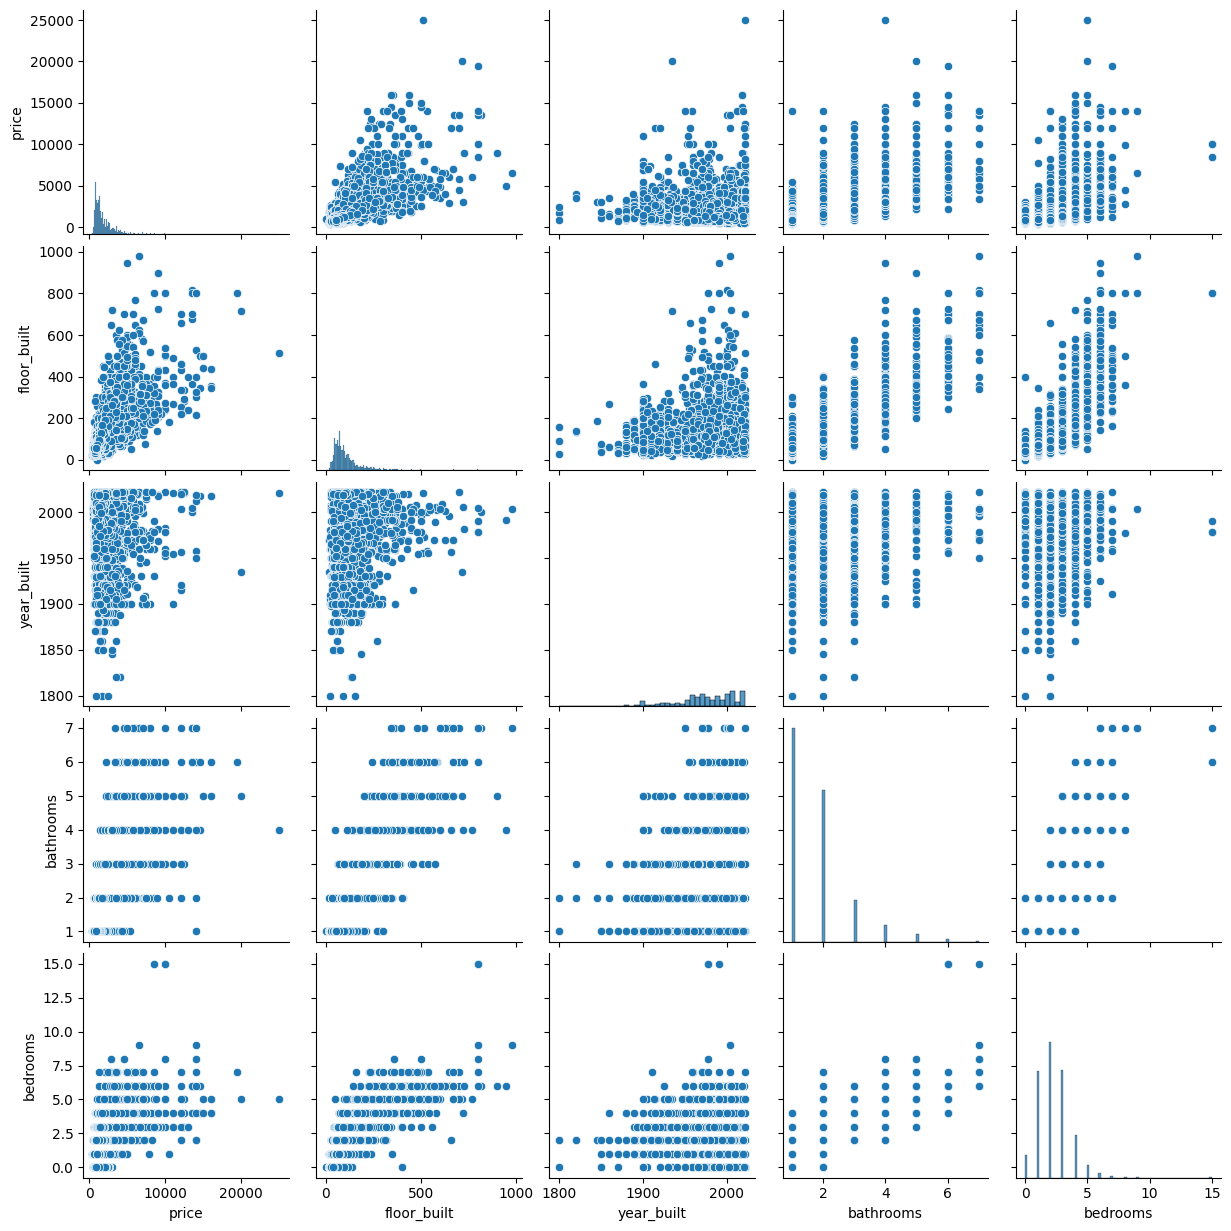

In [151]:
plt.figure(figsize=(55,5))
sns.pairplot(data=df_def, vars=['price', 'floor_built','year_built', 'bathrooms', 'bedrooms'])
plt.show()

CONCLUSIONES:

- 'price' vs floor_built: la linea de tendencia es positiva, a mayor superficie mayor precio, como hay que esperar y su grado de correlacion es fuerte.Presenta una alta dispersion conforme aumenta el precio. Alta presencia de outliers que hay que controlar y tratar.
- 'price' vs 'year_built': relacion debil, no linear. Seria interesante discretizar por periodo como indicado precedentemente en el primer analisis descriptivo.
- 'price' vs ' bathrooms': presenta una relacion lineal positiva moderada. 
- 'price' vs 'bedrooms': relacion lineal debil, a mas habitaciones no hay un incremento sustancial del precio. La varialble sola no explica 'price'. Podriamos definir una nueva feature price/m2 y ver si mejoraria la relación. 

### VALORES CATEGORICOS

#### ANALISIS VARIABLE OBJETIVO 'balcony'

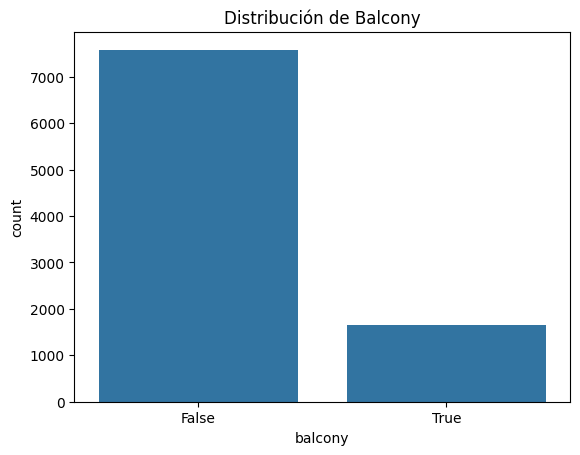

,conteo,porcentaje
balcony,,
False,7579,82.12
True,1650,17.88


In [30]:
# Balanceo

# ANÁLISIS DE BALANCEO PARA 'BALCONY' (Clasificación)
df_balanceo_balcony = pd.DataFrame({
    "conteo": df_new['balcony'].value_counts(),
    "porcentaje": (df_new['balcony'].value_counts(normalize=True) * 100).round(2)
})

sns.countplot(data=df_new, x='balcony')
plt.title('Distribución de Balcony')
plt.show()

df_balanceo_balcony


In [31]:
#CODIGO 

INTERPRETACION RESULTADOS 

## 4. Preparación de Datos - PREPROCESSING

Seleccion incial de columnas y target

* Numericas: 'floor_built', 'floor_area', 'bathrooms', 'bedrooms', 'year_built'
* Categoricas: 'type', 'district'
* Target:
   * Regresion: 'priece' 
   * Clasificacion binaria: 'balcony'

#### Para REGRESION

In [32]:
df_reg = df.dropna(subset=['price']).copy()
X_rg= df_reg[["floor_built", "floor_area", "bathrooms" ,"bedrooms", "year_built", "type","district"]]
y_rg= df_reg['price']

X_rg_train, X_rg_test, y_rg_train, y_rg_test = train_test_split(X_rg, y_rg, test_size=0.20, random_state=42)
print(f"{'Train:', X_rg_train.shape}")
print(f"{'Test:', X_rg_test.shape}")

('Train:', (7383, 7))
('Test:', (1846, 7))


- PIPELINE

In [33]:
numerical_cols_selector = make_column_selector (dtype_include=np.number)
categorical_cols_selector= make_column_selector(dtype_include=object)

numerical_pipeline= make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

preprocesor= make_column_transformer(
    (numerical_pipeline, numerical_cols_selector),
    (categorical_pipeline, categorical_cols_selector)
)

preprocesor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E04308FE00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E0478C8410>)])

In [34]:
pipeline_regression = make_pipeline(preprocesor,LinearRegression())
pipeline_regression.fit(X_rg_train, y_rg_train)
pipeline_regression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E04308FE00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E0478C8410>)])),
                ('linearregression', LinearRegression())])

In [35]:
y_pred = pipeline_regression.predict(X_rg_test)

metrics_df = pd.DataFrame({
    "Metric": ["R2", "MAE", "MSE", "RMSE"],
    "Value": [
        r2_score(y_rg_test, y_pred),
        mean_absolute_error(y_rg_test, y_pred),
        mean_squared_error(y_rg_test, y_pred),
        np.sqrt(mean_squared_error(y_rg_test, y_pred))
    ]
})

metrics_df


NameError: name 'r2_score' is not defined

In [ ]:
regresion_precios = pd.DataFrame({'price_real': y_rg_test.values, 'price_pred':y_pred})
regresion_precios.head(5)

,price_real,price_pred
0,2300,2482.685689
1,4200,3889.705046
2,1500,1754.076693
3,2200,1458.826152
4,800,1314.821276


por cada precio real, se indica lo que hubiera prdecido el modelo.

#### Para CLASIFICACION

- clonamos el Preprocesado realizado con REGRESION

In [ ]:
preprocesor_clasification = clone (preprocesor)
pipeline_clasificacion = make_pipeline(
    preprocesor_clasification,
    LogisticRegression(max_iter=500)
)
pipeline_clasificacion

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output 

In [ ]:
df_clas = df.dropna(subset=['balcony']).copy()
X_cl= df_clas[["floor_built", "floor_area", "bathrooms" ,"bedrooms", "year_built", "type","district"]]  # selecion de las mismas feature utilizadas en REGRESION
y_cl= df_clas['balcony']

X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.20, random_state=42)
print(f"{'Train:', X_cl_train.shape}")
print(f"{'Test:', X_cl_test.shape}")


('Train:', (7383, 7))
('Test:', (1846, 7))


In [ ]:
pipeline_clasificacion.fit(X_cl_train, y_cl_train)
pipeline_clasificacion

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output 

In [ ]:
y_cl_pred = pipeline_clasificacion.predict(X_cl_test)

metrics_df = pd.DataFrame({
    "Metric": ["ACCURACY", "F1", "BALANCED", "PRECISION", "RECALL"],
    "Value": [
        accuracy_score(y_cl_test, y_cl_pred),
        f1_score(y_cl_test, y_cl_pred),
        balanced_accuracy_score(y_cl_test, y_cl_pred),
        precision_score(y_cl_test, y_cl_pred),
        recall_score(y_cl_test, y_cl_pred)
    ]
})

metrics_df

,Metric,Value
0,ACCURACY,0.822860
1,F1,0.046647
2,BALANCED,0.507016
3,PRECISION,0.320000
4,RECALL,0.025157


## 5. Modelado

#### Para REGRESION

#### Para CLASIFICACION

## 6. Conclusiones